In [2]:
pip install LinearRegression


The following command must be run outside of the IPython shell:

    $ pip install LinearRegression

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 读取房价数据
house_excel_file = pd.ExcelFile(r'C:\Users\DELL\Desktop\数据\house_data.xlsx')
house_df = house_excel_file.parse('Sheet1')

# 读取租金数据
rent_excel_file = pd.ExcelFile(r'C:\Users\DELL\Desktop\数据\rent_data.xlsx')
rent_df = rent_excel_file.parse('Sheet1')

In [4]:
# 将location列转换为虚拟变量
house_dummies = pd.get_dummies(house_df['location'], prefix='location', drop_first=True)

# 将虚拟变量与原始房价数据合并
house_df = pd.concat([house_df, house_dummies], axis=1)

# 构建房价数据中的交互项
house_df['area_location_2'] = house_df['area'] * house_df['location_2']
house_df['area_location_3'] = house_df['area'] * house_df['location_3']
house_df['area_location_4'] = house_df['area'] * house_df['location_4']

# 提取房价模型的自变量和因变量
X_house = house_df[['area', 'location_2', 'location_3', 'location_4',
                    'area_location_2', 'area_location_3', 'area_location_4']]
y_house = house_df['price/m2']

# 创建房价的线性回归模型对象
house_model = LinearRegression()
house_model.fit(X_house, y_house)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
# 计算每平方米租金，即总租金除以面积
rent_df['rent_price/m2'] = rent_df['rent_price'] / rent_df['area']

# 将location列转换为虚拟变量
rent_dummies = pd.get_dummies(rent_df['location'], prefix='location', drop_first=True)

# 将生成的虚拟变量与原始数据合并
rent_df = pd.concat([rent_df, rent_dummies], axis=1)

# 构建交互项
rent_df['area_location_2'] = rent_df['area'] * rent_df['location_2']
rent_df['area_location_3'] = rent_df['area'] * rent_df['location_3']
rent_df['area_location_4'] = rent_df['area'] * rent_df['location_4']

# 提取自变量和因变量
X_rent = rent_df[['area', 'location_2', 'location_3', 'location_4',
                  'area_location_2', 'area_location_3', 'area_location_4']]
y_rent = rent_df['rent_price/m2']

# 创建线性回归模型对象
rent_model = LinearRegression()
rent_model.fit(X_rent, y_rent)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# 定义不同的面积
areas = [50, 100]
# 区域映射字典，将区域编号映射为实际的区域名称
location_mapping = {1: 'Huilongguan', 2: 'Tiantongyuan', 3: 'Huoying', 4: 'Shahe'}

In [8]:
# 存储每个街区不同面积下的预测结果
results = {}
for area in areas:
    for location_num, location_name in location_mapping.items():
        input_data = [area] + [0] * 3
        input_data.extend([0] * 3)
        if location_num > 1:
            input_data[location_num - 1] = 1
            input_data[3 + location_num - 1] = area
        input_df = pd.DataFrame([input_data], columns=X_rent.columns)

        # 预测每平方米租金
        rent_per_m2_pred = rent_model.predict(input_df)[0]
        # 计算总租金
        total_rent_pred = rent_per_m2_pred * area
        # 预测每平方米售价
        price_per_m2_pred = house_model.predict(input_df)[0]

        if location_name not in results:
            results[location_name] = []
        results[location_name].append({
            '面积': area,
            '每平方米租金': rent_per_m2_pred,
            '总租金': total_rent_pred,
            '每平方米售价': price_per_m2_pred
        })

In [9]:
# 打印预测结果
for location, data in results.items():
    for item in data:
        print(f"街区: {location}, 面积: {item['面积']} 平方米, 每平方米租金: {item['每平方米租金']:.2f}, 总租金: {item['总租金']:.2f}, 每平方米售价: {item['每平方米售价']:.2f}")

街区: Huilongguan, 面积: 50 平方米, 每平方米租金: 90.15, 总租金: 4507.32, 每平方米售价: 53721.47
街区: Huilongguan, 面积: 100 平方米, 每平方米租金: 73.73, 总租金: 7372.59, 每平方米售价: 52211.60
街区: Tiantongyuan, 面积: 50 平方米, 每平方米租金: 89.00, 总租金: 4449.75, 每平方米售价: 34596.42
街区: Tiantongyuan, 面积: 100 平方米, 每平方米租金: 54.53, 总租金: 5452.83, 每平方米售价: 34854.20
街区: Huoying, 面积: 50 平方米, 每平方米租金: 81.52, 总租金: 4075.86, 每平方米售价: 48709.84
街区: Huoying, 面积: 100 平方米, 每平方米租金: 42.69, 总租金: 4269.47, 每平方米售价: 48044.72
街区: Shahe, 面积: 50 平方米, 每平方米租金: 57.87, 总租金: 2893.44, 每平方米售价: 40523.31
街区: Shahe, 面积: 100 平方米, 每平方米租金: 58.55, 总租金: 5854.57, 每平方米售价: 43038.88


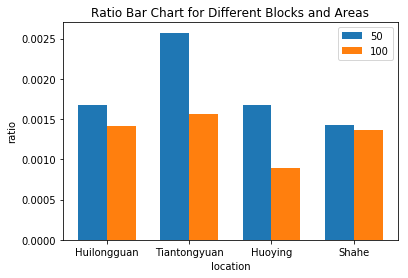

In [10]:
# 计算租售比并绘制柱状图
rent_sale_ratios = {}
for location, data in results.items():
    rent_sale_ratios[location] = [item['每平方米租金'] / item['每平方米售价'] for item in data]

bar_width = 0.35
index = range(len(location_mapping))

fig, ax = plt.subplots()
bar1 = ax.bar([i - bar_width / 2 for i in index], [rent_sale_ratios[loc][0] for loc in location_mapping.values()],
              bar_width, label='50')
bar2 = ax.bar([i + bar_width / 2 for i in index], [rent_sale_ratios[loc][1] for loc in location_mapping.values()],
              bar_width, label='100')

ax.set_xlabel('location')
ax.set_ylabel('ratio')
ax.set_title('Ratio Bar Chart for Different Blocks and Areas')
ax.set_xticks(index)
ax.set_xticklabels(location_mapping.values())
ax.legend()
